In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

### Let's first try and choose $|\psi\rangle = |\psi'\rangle = |+\rangle$.

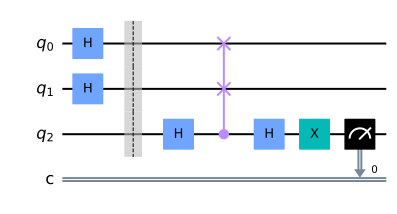

In [2]:
qc = QuantumCircuit(3, 1)
qc.h([0, 1])
qc.barrier()
qc.h(2)
qc.cswap(2, 1, 0)
qc.h(2)
qc.x(2)
qc.measure(2, 0)
qc.draw()

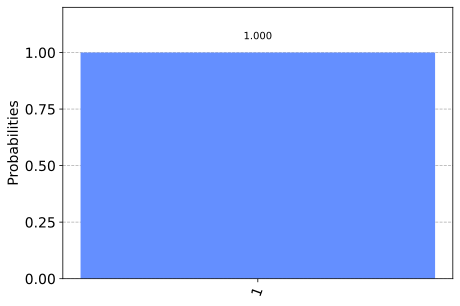

In [3]:
simulator = Aer.get_backend("qasm_simulator")
job = execute(qc, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### Let's now choose $|\psi\rangle = |0\rangle$, and $|\psi'\rangle = |+\rangle$.

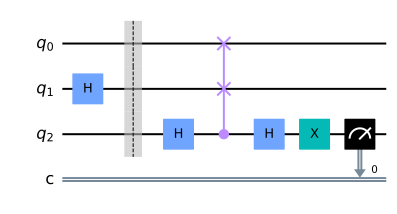

In [4]:
qc = QuantumCircuit(3, 1)
qc.h(1)
qc.barrier()
qc.h(2)
qc.cswap(2, 1, 0)
qc.h(2)
qc.x(2)
qc.measure(2, 0)

qc.draw()

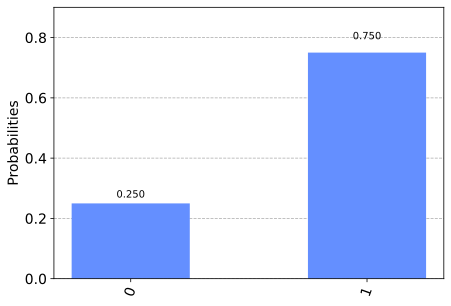

In [5]:
job = execute(qc, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### Let's try again and choose the orthogonals $|\psi\rangle = |+\rangle$, and $|\psi'\rangle = |-\rangle$.

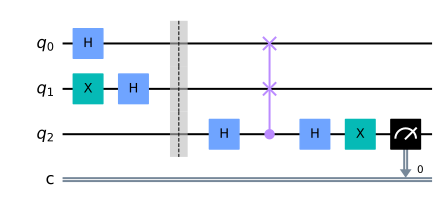

In [6]:
qc = QuantumCircuit(3, 1)
qc.x(1)
qc.h([0, 1])
qc.barrier()
qc.h(2)
qc.cswap(2, 1, 0)
qc.h(2)
qc.x(2)
qc.measure(2, 0)

qc.draw()

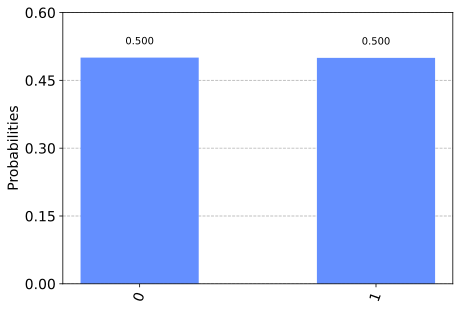

In [7]:
job = execute(qc, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### What if they are the same up to a global phase? Let's try the states in 3(a).

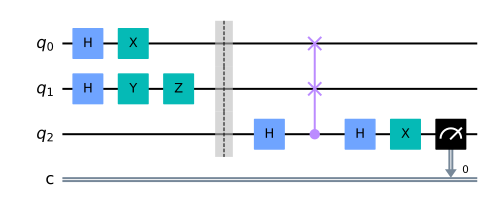

In [8]:
qc = QuantumCircuit(3, 1)
qc.h([0, 1])
qc.x(0)
qc.y(1)
qc.z(1)
qc.barrier()
qc.h(2)
qc.cswap(2, 1, 0)
qc.h(2)
qc.x(2)
qc.measure(2, 0)

qc.draw()

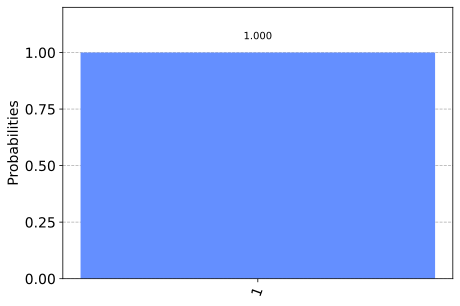

In [9]:
job = execute(qc, simulator, shots = 1000000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

### It's the same!